# The problem domain¶
For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

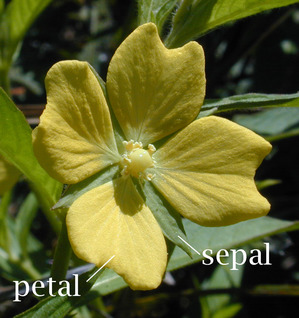

We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of Iris flowers:

### <i>Iris setosa<i>
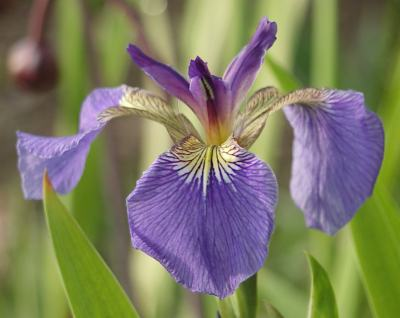

### <i>Iris versicolor<i>
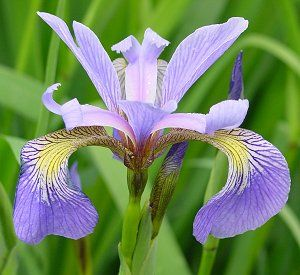
  
### <i>Iris virginica<i>
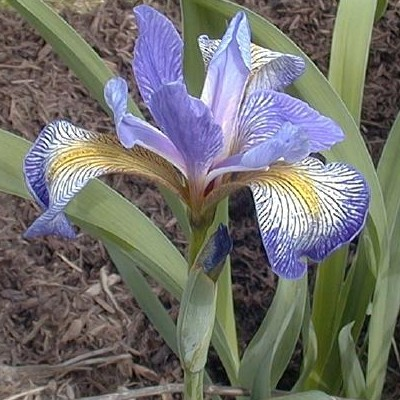

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.
    
This notebook was done following the one of Randal Olson which you can look clicking [here](https://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)

## Understanding the question
The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task.
- We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.
- Since we're performing classification, we can use accuracy — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.
- We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.
- The data set we currently have is only for three types of Iris flowers. The model built off of this data set will only work for those Iris flowers, so we will need more data to create a general flower classifier.


### Checking the data
The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

- Is there anything wrong with the data?
- Are there any quirks with the data?
- Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris_data = pd.read_csv("DATA\iris-data.csv")

In [3]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Returns basic information on all columns
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 150 instances in the dataset, which means that it is small by Machine Learning standards. Notice that there are 5 missing values in the pedal_width_cm attribute

In [5]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.



In [6]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,5.644627,1.312781,0.055,5.1,5.70,6.4,7.9
sepal_width_cm,150.0,3.054667,0.433123,2.000,2.8,3.00,3.3,4.4
petal_length_cm,150.0,3.758667,1.764420,1.000,1.6,4.35,5.1,6.9
petal_width_cm,145.0,1.236552,0.755058,0.100,0.4,1.30,1.8,2.5


We are just dealing with numerical data

## Visual Exploratory Data Analysis (EDA)

In [7]:
iris_data["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [8]:
def iris_class(iris):
    if iris == "versicolor":
        return "Iris-versicolor"
    elif iris == "Iris-setossa":
        return "Iris-setosa"
    else:
        return iris

In [9]:
iris_data["class"] = iris_data["class"].apply(iris_class)

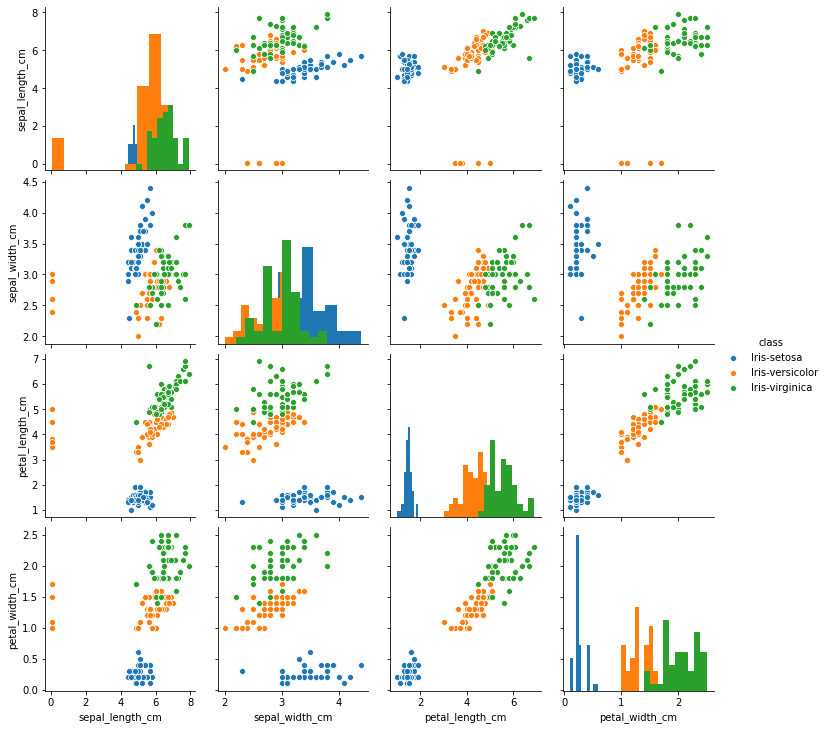

In [10]:
sns.pairplot(iris_data,hue="class",diag_kind="hist")

There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.

In the case of the one anomalous entry for Iris-setosa, let's say our field researchers know that it's impossible for Iris-setosa to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

In [11]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

In [12]:
setosa = iris_data[iris_data["class"] == "Iris-setosa"]

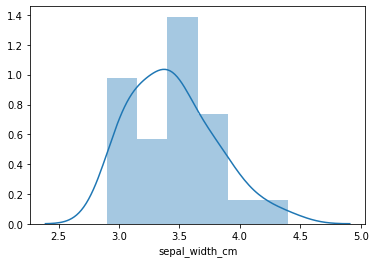

In [13]:
sns.distplot(setosa["sepal_width_cm"])

In [14]:
iris_data[(iris_data["class"] == "Iris-versicolor") & (iris_data["sepal_length_cm"] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


How about that? All of these near-zero sepal_length_cm entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

In [15]:
iris_data.loc[(iris_data["class"] == "Iris-versicolor") & (iris_data["sepal_length_cm"] < 1.0), "sepal_length_cm"] 

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

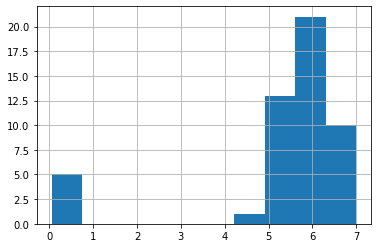

In [16]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

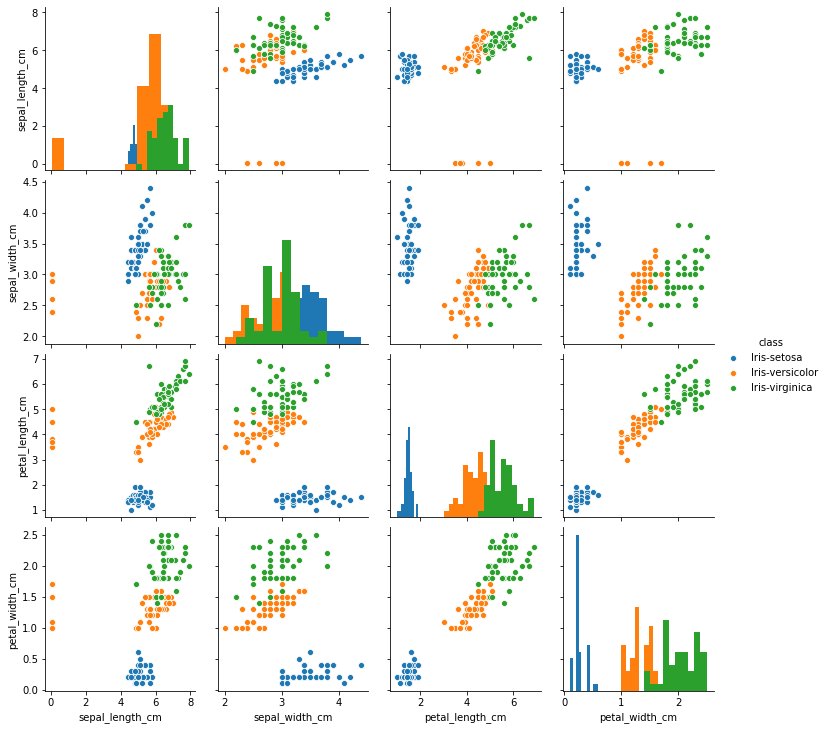

In [17]:
sns.pairplot(iris_data,hue="class",diag_kind="hist")

In [18]:
iris_data[iris_data["petal_width_cm"].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


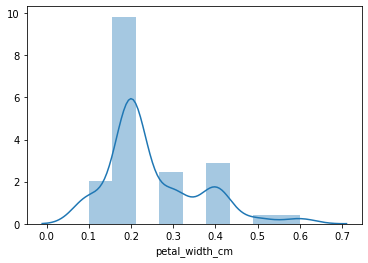

In [19]:
sns.distplot(setosa["petal_width_cm"])

In [20]:
setosa_petal_mean = setosa["petal_width_cm"].mean()

In [21]:
iris_data.fillna(setosa_petal_mean,inplace=True)

C:\Users\Diego\miniconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
iris_data.isnull().sum() / len(iris_data) * 100

sepal_length_cm    0.0
sepal_width_cm     0.0
petal_length_cm    0.0
petal_width_cm     0.0
class              0.0
dtype: float64

In [23]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

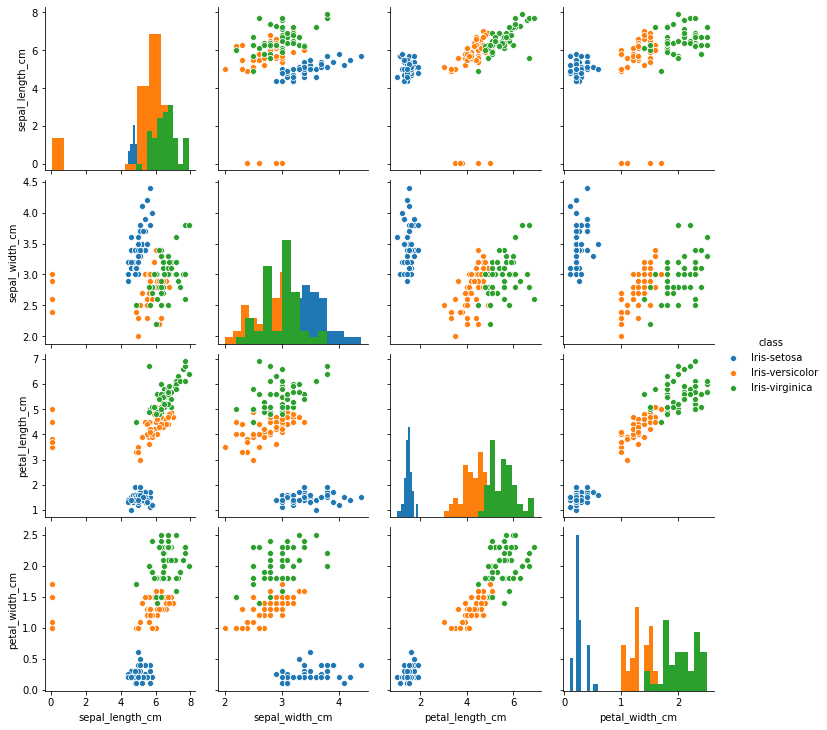

In [24]:
sns.pairplot(iris_data_clean,hue="class",diag_kind="hist")

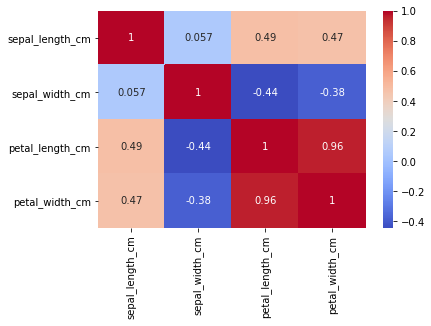

In [25]:
sns.heatmap(iris_data_clean.corr(),cmap="coolwarm",annot=True)

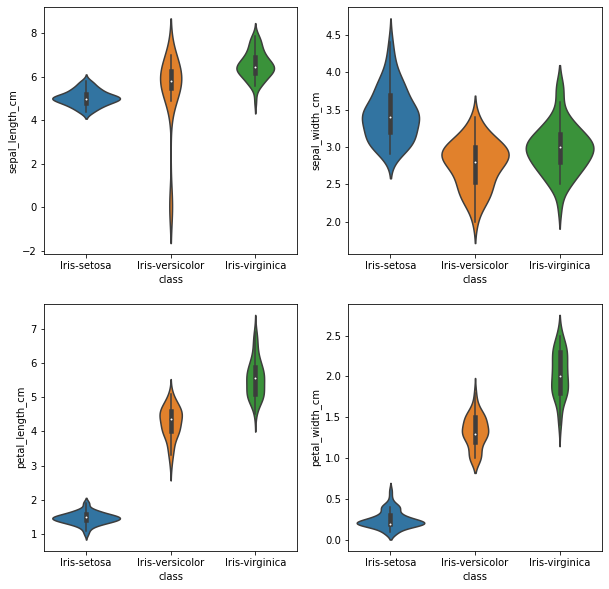

In [26]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=iris_data_clean)

In [27]:
iris = iris_data_clean.drop('class',axis=1)
iris_labels = iris_data_clean['class'].copy()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris, iris_labels, test_size=0.3, random_state=42)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [30]:
# evaluate each model in turn
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto',probability=True)))
models.append(('RFC', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.951818 (0.063121)
CART: 0.971818 (0.059259)
SVM: 0.990909 (0.027273)
RFC: 0.961818 (0.076472)


Text(0.5, 1.0, 'Algorithm Comparison ')

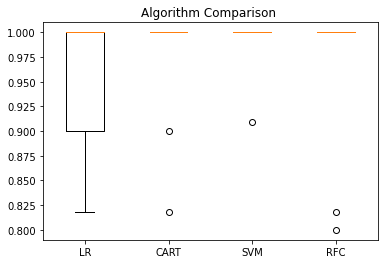

In [31]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison ')

In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf','linear']
             }  
  

model =  SVC(probability=True)
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)    
grid_search = GridSearchCV(model, param_grid, cv=kfold,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy')

In [33]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_acc = accuracy_score(y_test, final_predictions)

In [35]:
final_acc

0.9333333333333333

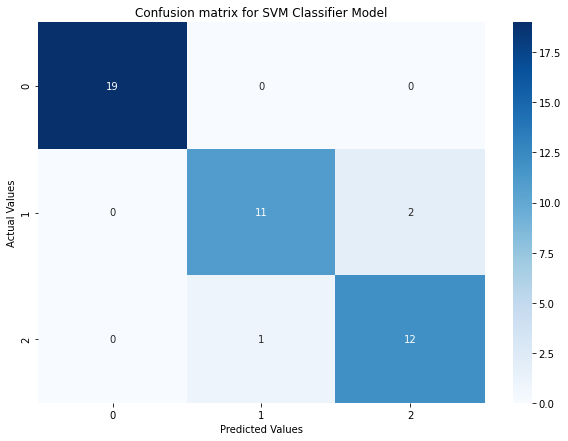

In [36]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for SVM Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [37]:
# Evaluate predictions
print(classification_report(y_test, final_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.93      0.93      0.93        45

